# K-Means++ vs. Coreset Trees

In [1]:
from layer_flow.data import DatasetFactory
from layer_flow.clustering import coreset_tree, kmpp, compute_clustering_cost
from layer_flow.clustering.draw import plot_cluster_hulls

import matplotlib.pyplot as plt
import time

## Performance Comparison

In [2]:
seed = 1
ds = DatasetFactory.create('mnist')
X, y = ds.X, ds.y

ks = [10, 30, 50, 100]

In [3]:
kmpp_times = []
kmpp_costs = []
for k in ks:
    start = time.time()
    centroids = kmpp(X, k, seed, verbose=True)
    kmpp_times.append(time.time() - start)
    cost = compute_clustering_cost(X, centroids)
    kmpp_costs.append(cost)
    print(f'K={k}, K-means++ time: {kmpp_times[-1]:.2f}s, cost: {cost:.2f}')

100%|██████████| 9/9 [00:02<00:00,  3.20it/s]


K=10, K-means++ time: 2.82s, cost: 4829265.50


100%|██████████| 29/29 [00:09<00:00,  3.05it/s]


K=30, K-means++ time: 9.52s, cost: 4049704.00


100%|██████████| 49/49 [00:15<00:00,  3.13it/s]


K=50, K-means++ time: 15.68s, cost: 3709991.50


100%|██████████| 99/99 [00:31<00:00,  3.11it/s]


K=100, K-means++ time: 31.79s, cost: 3305270.25


In [4]:
coreset_tree_times = []
coreset_tree_costs = []
for k in ks:
    start = time.time()
    centroids = coreset_tree(X, k, seed, verbose=True)
    coreset_tree_times.append(time.time() - start)
    cost = compute_clustering_cost(X, centroids)
    coreset_tree_costs.append(cost)
    print(f'K={k}, Coreset Tree time: {coreset_tree_times[-1]:.2f}s, cost: {cost:.2f}')

100%|██████████| 9/9 [00:01<00:00,  5.36it/s]


K=10, Coreset Tree time: 2.00s, cost: 4728890.50


100%|██████████| 29/29 [00:12<00:00,  2.26it/s]


K=30, Coreset Tree time: 14.32s, cost: 3987735.25


100%|██████████| 49/49 [00:14<00:00,  3.30it/s]


K=50, Coreset Tree time: 17.71s, cost: 3726033.25


100%|██████████| 99/99 [00:15<00:00,  6.49it/s]


K=100, Coreset Tree time: 16.57s, cost: 3324110.00


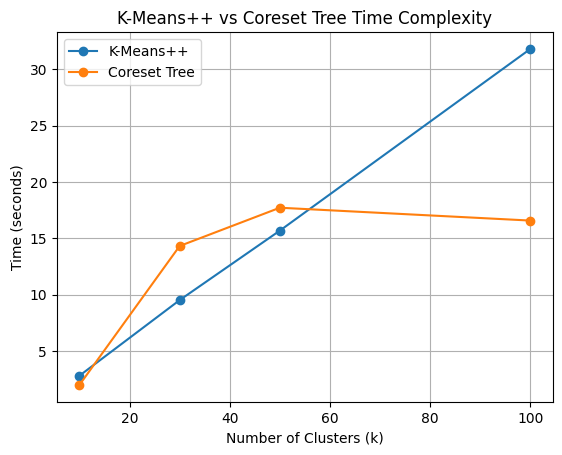

In [5]:
fig, ax = plt.subplots()
ax.plot(ks, kmpp_times, label='K-Means++', marker='o')
ax.plot(ks, coreset_tree_times, label='Coreset Tree', marker='o')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Time (seconds)')
ax.set_title('K-Means++ vs Coreset Tree Time Complexity')
ax.legend()
plt.grid()
plt.show()

## Random Projections
This section will explore the performance of K-Means++ and Coreset Trees using random projections. The goal is to compare how well each method performs in terms of clustering quality and computational efficiency when applied to high-dimensional data.

In [6]:
def jl_projection(X):
    from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection
    transformer = GaussianRandomProjection(n_components=250, random_state=42)
    return transformer.fit_transform(X)

In [7]:
X_jl = jl_projection(X)
print(f'JL projected shape: {X_jl.shape}')

JL projected shape: (70000, 250)


In [8]:
kmpp_times_jl = []
kmpp_costs_jl = []
for k in ks:
    start = time.time()
    centroids_jl, centroids_jl_idx = kmpp(X_jl, k, seed, verbose=True, index=True)
    kmpp_times_jl.append(time.time() - start)
    centroids = X[centroids_jl_idx]
    cost_jl = compute_clustering_cost(X, centroids)
    kmpp_costs_jl.append(cost_jl)
    print(f'K={k}, K-means++ on JL time: {kmpp_times_jl[-1]:.2f}s, cost: {cost_jl:.2f}')

  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:00<00:00,  9.97it/s]


K=10, K-means++ on JL time: 0.92s, cost: 5114229.00


100%|██████████| 29/29 [00:02<00:00, 10.58it/s]


K=30, K-means++ on JL time: 2.74s, cost: 4064766.50


100%|██████████| 49/49 [00:04<00:00, 11.81it/s]


K=50, K-means++ on JL time: 4.15s, cost: 3742159.50


100%|██████████| 99/99 [00:07<00:00, 12.87it/s]


K=100, K-means++ on JL time: 7.70s, cost: 3347133.50


In [9]:
coreset_tree_times_jl = []
coreset_tree_costs_jl = []

for k in ks:
    start = time.time()
    centroids_jl, centroids_jl_idx = coreset_tree(X_jl, k, seed, verbose=True, index=True)
    coreset_tree_times_jl.append(time.time() - start)
    centroids = X[centroids_jl_idx]
    cost_jl = compute_clustering_cost(X, centroids)
    coreset_tree_costs_jl.append(cost_jl)
    print(f'K={k}, Coreset Tree on JL time: {coreset_tree_times_jl[-1]:.2f}s, cost: {cost_jl:.2f}')

100%|██████████| 9/9 [00:00<00:00, 19.18it/s]


K=10, Coreset Tree on JL time: 0.58s, cost: 5158399.00


100%|██████████| 29/29 [00:00<00:00, 42.44it/s]


K=30, Coreset Tree on JL time: 0.78s, cost: 4036009.00


100%|██████████| 49/49 [00:00<00:00, 64.42it/s]


K=50, Coreset Tree on JL time: 0.86s, cost: 3566895.00


100%|██████████| 99/99 [00:00<00:00, 118.95it/s]


K=100, Coreset Tree on JL time: 0.93s, cost: 3232339.50


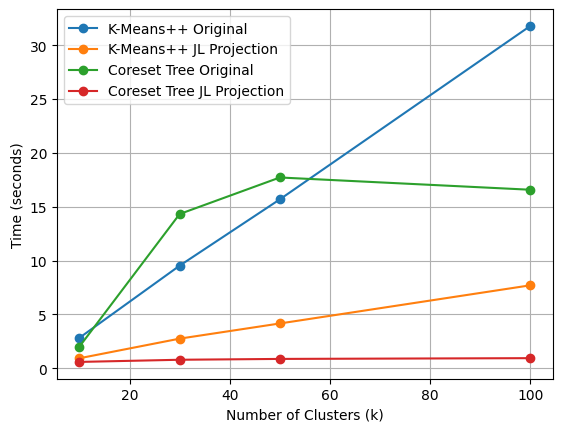

In [10]:
# Plotting the results for K-Means++ on original vs JL projected data
fig, ax = plt.subplots()
ax.plot(ks, kmpp_times, label='K-Means++ Original', marker='o')
ax.plot(ks, kmpp_times_jl, label='K-Means++ JL Projection', marker='o')
ax.plot(ks, coreset_tree_times, label='Coreset Tree Original', marker='o')
ax.plot(ks, coreset_tree_times_jl, label='Coreset Tree JL Projection', marker='o')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Time (seconds)')
ax.legend()
plt.grid()

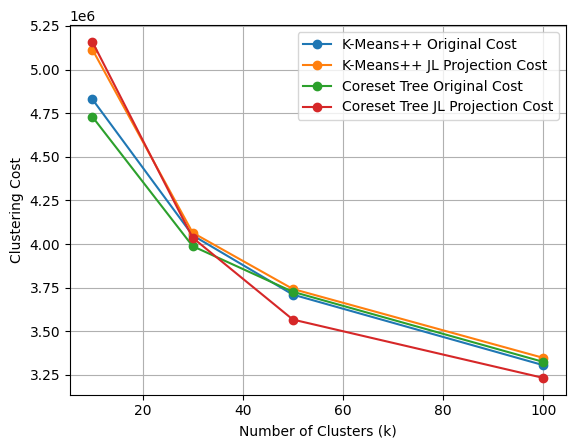

In [11]:
# Plotting the cost comparison
fig, ax2 = plt.subplots()
ax2.plot(ks, kmpp_costs, label='K-Means++ Original Cost', marker='o')
ax2.plot(ks, kmpp_costs_jl, label='K-Means++ JL Projection Cost', marker='o')
ax2.plot(ks, coreset_tree_costs, label='Coreset Tree Original Cost', marker='o')
ax2.plot(ks, coreset_tree_costs_jl, label='Coreset Tree JL Projection Cost', marker='o')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Clustering Cost')
ax2.legend()
plt.grid()


## Visualizations

100%|██████████| 5/5 [00:00<00:00, 2152.47it/s]


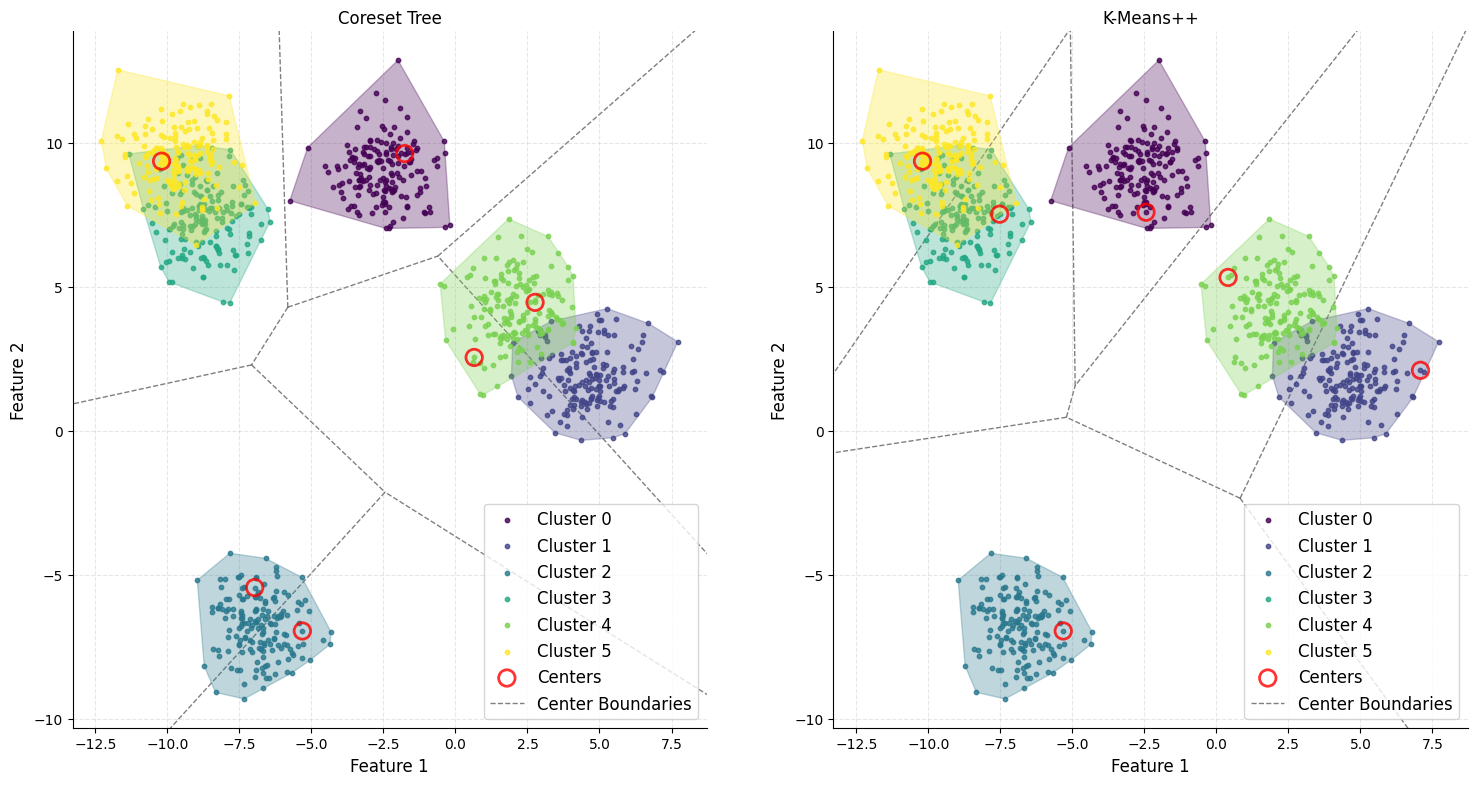

In [12]:
seed = 0
blobs = DatasetFactory.create('blobs', one_hot=False)
X, y = blobs.X, blobs.y

k = 6
centroids_coreset = coreset_tree(X, k, seed, verbose=True)
centroids_kmpp = kmpp(X, k, seed, verbose=True)

fig, ax = plt.subplots(1, 2, figsize=(18, 10))
ax[0].set_title('Coreset Tree')
ax[1].set_title('K-Means++')
plot_cluster_hulls(X, centroids_coreset, y, ax=ax[0])
plot_cluster_hulls(X, centroids_kmpp, y, ax=ax[1])

plt.show()